In [0]:
### import libraries 
# dbutils.library.restartPython()

In [0]:
# !pip install google-cloud-storage google-cloud-bigquery xgboost db-dtypes



In [0]:
import pandas as pd
import numpy as np
import os
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tempfile
from google.cloud import bigquery
from google.cloud import storage
from google.oauth2 import service_account
from ML_models_nasa_data import load_csv_data_from_bigquery,load_csv_data_from_bucket

In [0]:

### import data from local folder
# df = pd.read_csv(data)

### import data from gcp bucket folder
# df = load_csv_data_from_bucket(data)

### import data from bigquery
dataset = 'nasa_engine'
df = load_csv_data_from_bigquery(dataset)

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

df

,id,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RemainingUsefulLife
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.30,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.30,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.30,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.30,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.30,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128210,709,249,42.0046,0.8405,100,445.00,549.34,1365.59,1138.33,3.91,5.69,141.44,2212.52,8370.78,1.05,42.56,133.84,2388.59,8136.44,9.0822,0.02,333,2212,100.0,10.88,6.4530,6
128211,709,251,9.9998,0.2500,100,489.05,605.33,1516.36,1315.28,10.52,15.46,404.59,2319.66,8840.16,1.27,46.08,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,4
128212,709,253,0.0029,0.0000,100,518.67,643.68,1607.72,1430.56,14.62,21.57,569.04,2388.51,9126.53,1.31,48.24,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,2
128213,709,254,35.0046,0.8400,100,449.44,555.77,1381.29,1148.18,5.48,7.96,199.93,2223.78,8403.64,1.05,42.53,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,1


In [0]:
df.shape

(128215, 27)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128215 entries, 0 to 128214
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   128215 non-null  Int64  
 1   Cycle                128215 non-null  Int64  
 2   OpSet1               128215 non-null  float64
 3   OpSet2               128215 non-null  float64
 4   OpSet3               128215 non-null  Int64  
 5   SensorMeasure1       128215 non-null  float64
 6   SensorMeasure2       128215 non-null  float64
 7   SensorMeasure3       128215 non-null  float64
 8   SensorMeasure4       128215 non-null  float64
 9   SensorMeasure5       128215 non-null  float64
 10  SensorMeasure6       128215 non-null  float64
 11  SensorMeasure7       128215 non-null  float64
 12  SensorMeasure8       128215 non-null  float64
 13  SensorMeasure9       128215 non-null  float64
 14  SensorMeasure10      128215 non-null  float64
 15  SensorMeasure11  

In [0]:
# id names and size
df['id'].value_counts(sort=False)

578    449
415    409
593    398
384    396
370    379
      ... 
39     104
575    104
344    102
57     101
220    100
Name: id, Length: 709, dtype: Int64

In [0]:
# Column names
df.columns

Index(['id', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1',
       'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5',
       'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9',
       'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12',
       'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15',
       'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18',
       'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21',
       'RemainingUsefulLife'],
      dtype='object')

In [0]:
# Check null values
df.isnull().sum().sort_values() 

id                     0
SensorMeasure20        0
SensorMeasure19        0
SensorMeasure18        0
SensorMeasure17        0
SensorMeasure16        0
SensorMeasure15        0
SensorMeasure14        0
SensorMeasure13        0
SensorMeasure12        0
SensorMeasure11        0
SensorMeasure10        0
SensorMeasure21        0
SensorMeasure9         0
SensorMeasure7         0
SensorMeasure6         0
SensorMeasure5         0
SensorMeasure4         0
SensorMeasure3         0
SensorMeasure2         0
SensorMeasure1         0
OpSet3                 0
OpSet2                 0
OpSet1                 0
Cycle                  0
SensorMeasure8         0
RemainingUsefulLife    0
dtype: int64

# drop columns 
df.drop(['sagswellcount','uptimems'],axis=1,inplace=True)
df.head()

# Remove rows with null values in the entire DataFrame in-place / we can replace null values with mean median.
df.dropna(inplace=True)
# df.reset_index(drop=True, inplace=True)
df.shape

In [0]:
# Check duplicates
duplicates = df[df.duplicated()]
duplicates.shape

(0, 27)

# remove duplicates if present
df.drop_duplicates()
df.shape

In [0]:
# categorical variables
categorical_var = []
for i in df.columns :
    if df[i].dtypes=='object':
        categorical_var.append(i)
categorical_var

[]

In [0]:
# numerical variables
numerical_var = []
for i in df.columns :
    if df[i].dtypes=='int64' or df[i].dtypes=='float':
        numerical_var.append(i)
numerical_var

['OpSet1',
 'OpSet2',
 'SensorMeasure1',
 'SensorMeasure2',
 'SensorMeasure3',
 'SensorMeasure4',
 'SensorMeasure5',
 'SensorMeasure6',
 'SensorMeasure7',
 'SensorMeasure8',
 'SensorMeasure9',
 'SensorMeasure10',
 'SensorMeasure11',
 'SensorMeasure12',
 'SensorMeasure13',
 'SensorMeasure14',
 'SensorMeasure15',
 'SensorMeasure16',
 'SensorMeasure19',
 'SensorMeasure20',
 'SensorMeasure21']

In [0]:
# statistical description of each variable
df.describe()

,id,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RemainingUsefulLife
count,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.00000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000,128215.000000
mean,370.169169,123.408946,17.236960,0.410540,95.724993,485.789158,597.296084,1466.884552,1260.78008,9.887544,14.413899,359.441913,2273.713052,8677.080776,1.153567,44.208577,338.518524,2349.651455,8088.944209,9.055280,0.025180,360.659837,2273.637242,98.389391,25.923409,15.554240,122.246952
std,203.608243,83.590688,16.526951,0.367808,12.358227,30.411757,42.462851,118.141728,136.25073,4.264407,6.441972,174.070628,142.378323,374.522596,0.142062,3.425249,164.133285,111.160122,80.615617,0.751257,0.004997,31.008988,142.464722,4.655962,11.687326,7.012806,83.398829
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.77000,3.910000,5.670000,136.310000,1914.720000,7984.510000,0.930000,36.040000,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300,0.000000
25%,196.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.950000,1357.300000,1126.80000,5.480000,8.000000,175.700000,2212.120000,8334.710000,1.020000,42.010000,164.780000,2387.970000,8070.530000,8.439600,0.020000,332.000000,2212.000000,100.000000,14.330000,8.600500,56.000000
50%,381.000000,114.000000,19.998200,0.620000,100.000000,489.050000,605.810000,1492.760000,1270.65000,9.350000,13.660000,341.280000,2319.260000,8763.980000,1.090000,44.920000,321.240000,2388.070000,8118.510000,9.039900,0.030000,367.000000,2319.000000,100.000000,24.900000,14.935100,112.000000
75%,547.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.24000,14.620000,21.610000,553.290000,2388.050000,9055.810000,1.300000,47.340000,521.340000,2388.160000,8139.365000,9.344300,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294100,172.000000
max,709.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.49000,14.620000,21.610000,570.810000,2388.640000,9244.590000,1.320000,48.530000,537.490000,2390.490000,8293.720000,11.066300,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500,542.000000


df[categorical_var].describe()

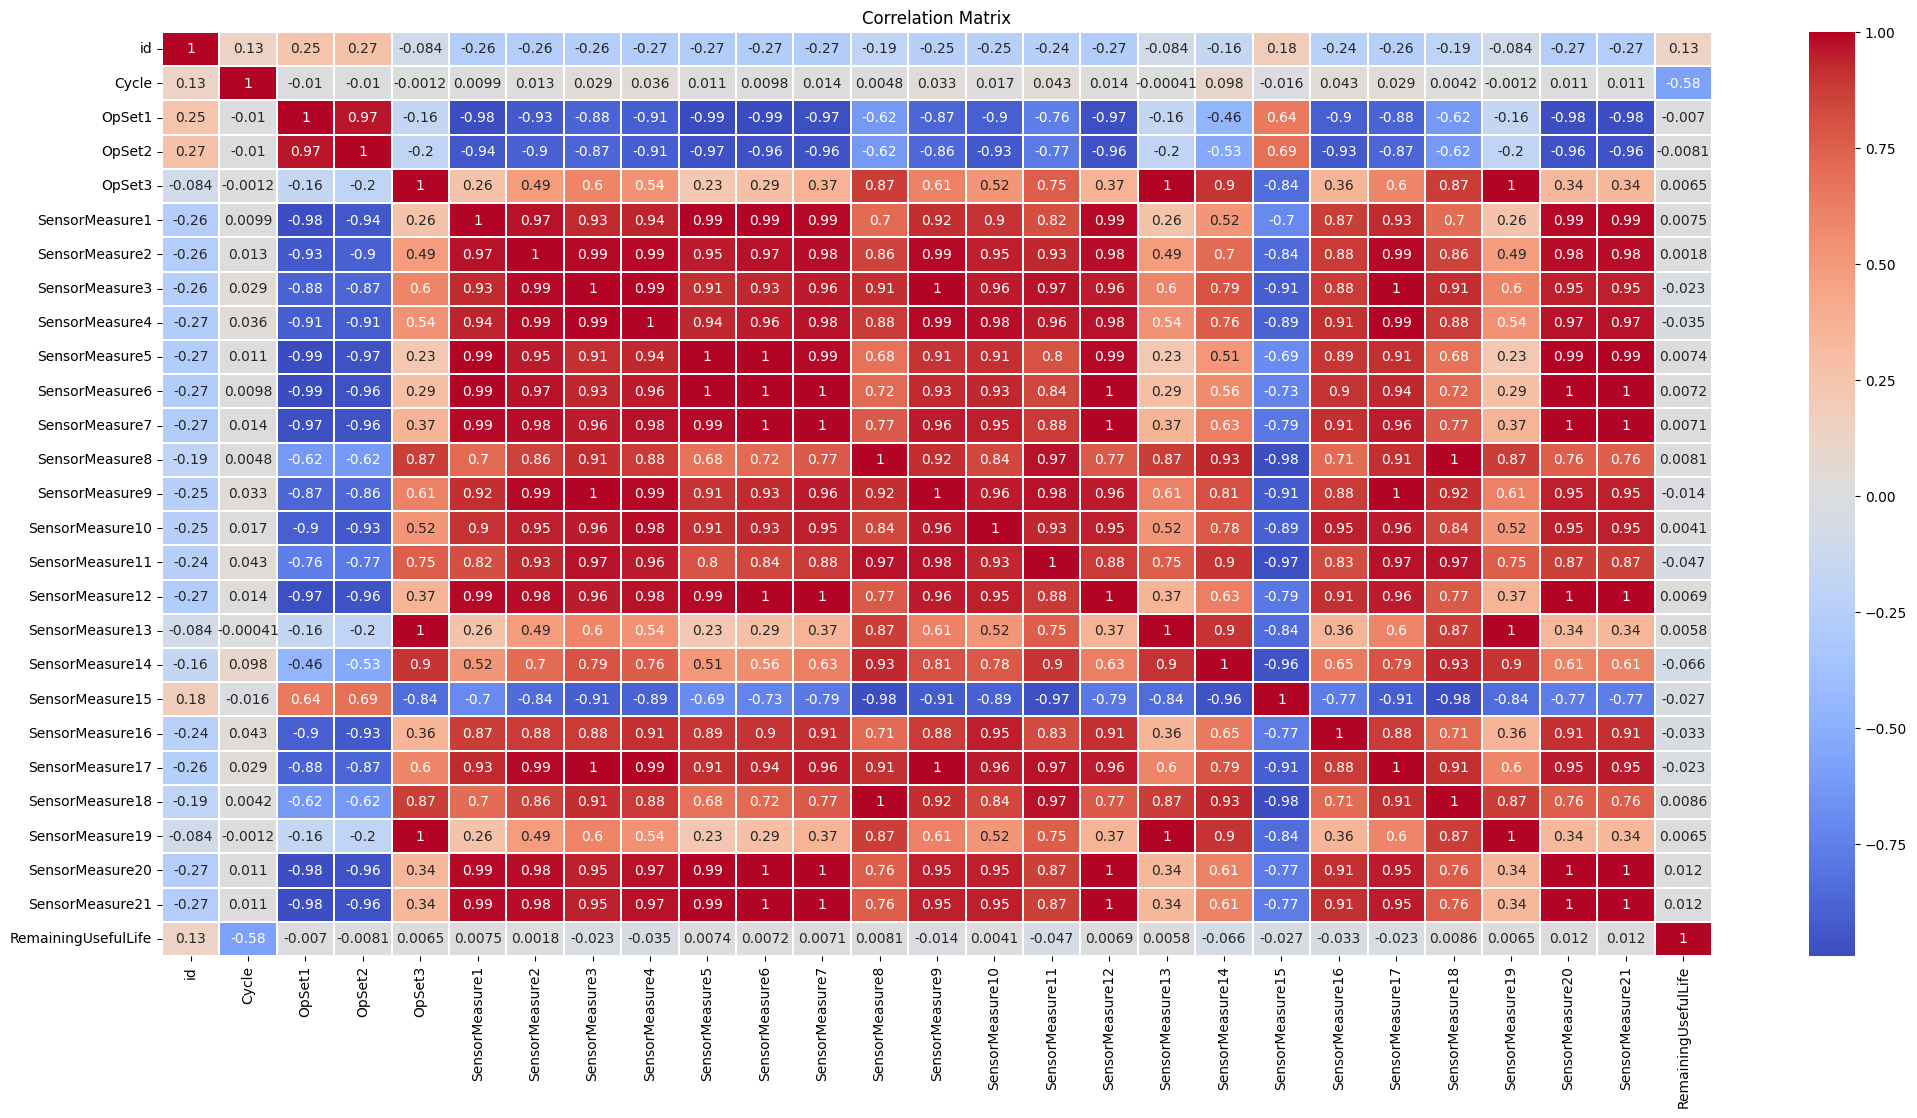

In [0]:
# Pearson correlation matrix
corr_matrix = df.corr('pearson')
plt.figure(figsize=(25,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

In [0]:
# Checking Outliers using IQR method.
result_outliers = []        
for i in df.columns:
    if ((df[i]).dtype=="float64") or ((df[i]).dtype=="int64"):
        #Findout outliers using IQR method
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR    #create lower fence
        upper = Q3 + 1.5*IQR    #create upper fence

        # Create arrays of values indicating the outlier rows index values
        upper_array = np.where(df[i]>upper)[0]
        lower_array = np.where(df[i]<lower)[0]
        
        if len(lower_array)>0 or len(upper_array)>0:
            result_outliers.append({'variable_name':i,'lower_fence':lower,'upper_fence':upper,
                           'Number_of_obs_less_than_lower_fence':len(lower_array),
                           'Number_of_obs_greater_than_upper_fence':len(upper_array),
                                       'lower_array':lower_array[:10],'upper_array':upper_array[:10]})
        else :
            result_outliers.append({f'variable_name {i}':'No outliers present',})
result_outliers

[{'variable_name OpSet1': 'No outliers present'},
 {'variable_name OpSet2': 'No outliers present'},
 {'variable_name SensorMeasure1': 'No outliers present'},
 {'variable_name SensorMeasure2': 'No outliers present'},
 {'variable_name SensorMeasure3': 'No outliers present'},
 {'variable_name SensorMeasure4': 'No outliers present'},
 {'variable_name SensorMeasure5': 'No outliers present'},
 {'variable_name SensorMeasure6': 'No outliers present'},
 {'variable_name SensorMeasure7': 'No outliers present'},
 {'variable_name': 'SensorMeasure8',
  'lower_fence': 1948.2249999999995,
  'upper_fence': 2651.9450000000006,
  'Number_of_obs_less_than_lower_fence': 13703,
  'Number_of_obs_greater_than_upper_fence': 0,
  'lower_array': array([16510, 16527, 16533, 16535, 16537, 16544, 16552, 16563, 16564,
         16566]),
  'upper_array': array([], dtype=int64)},
 {'variable_name SensorMeasure9': 'No outliers present'},
 {'variable_name SensorMeasure10': 'No outliers present'},
 {'variable_name SensorM

### Convert outliers to lower and upper fence or we can use different methods like mean and median
for i in numerical_var:
    #Findout outliers using IQR method
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR    #create lower fence
    upper = Q3 + 1.5*IQR    #create upper fence

    #Convert outliers into lower fence and upper fence
    df[i]=df[i].clip(lower,upper)
df.head()

### *********************** Visualization ******************************

### Lineplot for single var with multiple ids

In [0]:
from ML_models_nasa_data import lineplot_single_var_mult_ids

### select data file
data = 'nasa_engine'

### select ids
id = [1,2,3,4]

### Select variable from below list
var=['SensorMeasure1','SensorMeasure20']  
# ['OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1','SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5',
# 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9','SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12','SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15',
# 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18','SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21','RemainingUsefulLife']

start_cycle=None 
end_cycle=None
maintenance_start=None
maintenance_end=None

lineplot_single_var_mult_ids(data, id, var,start_cycle,end_cycle, maintenance_start, maintenance_end)

### Lineplot for multiple ids with multiple variables

In [0]:
from ML_models_nasa_data import lineplot_mult_ids_mult_vars

### select data file
data = 'nasa_engine'

### select ids
ids = [150,190,200,500,700]

### Select variable from below list
var=['SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5','SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9']  
# ['OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1','SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5',
# 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9','SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12','SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15',
# 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18','SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21','RemainingUsefulLife']

start_cycle=None 
end_cycle=None
maintenance_start=None
maintenance_end=None

lineplot_mult_ids_mult_vars(data, ids, var,start_cycle,end_cycle, maintenance_start, maintenance_end)

### Scatterplot for single id with multi-variables

In [0]:
from ML_models_nasa_data import display_life_plotly_features

### select data file
data = 'nasa_engine'

### select ids
id = 500

### Select variable from below list
var=['SensorMeasure10','SensorMeasure20']  
# ['OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1','SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5',
# 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9','SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12','SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15',
# 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18','SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21','RemainingUsefulLife']

start_cycle=None 
end_cycle=None
maintenance_start=None
maintenance_end=None

display_life_plotly_features(data, id, var, start_cycle, end_cycle, maintenance_start, maintenance_end)